In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, SimpleRNN, Embedding, Flatten

In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [8]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 66.6MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 40.7MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 136MB/s]


In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
print(train.shape, test.shape, submission.shape)

(7613, 5) (3263, 4) (3263, 2)


In [10]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
word_len=[]
for i in range(len(train)):
    word_len.append(len(train.text.values[i].split(' ')))    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


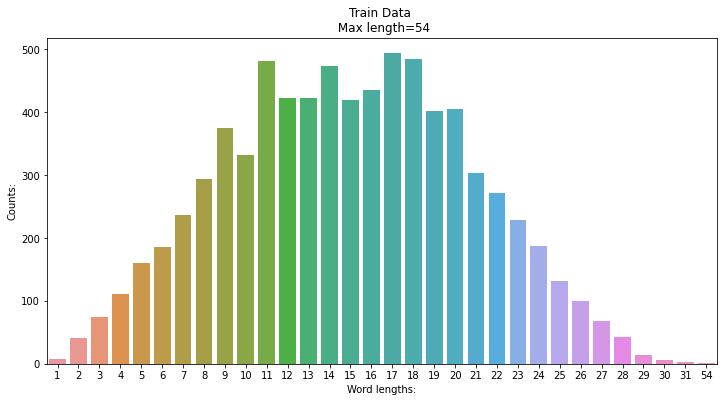

In [12]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(word_len)
plt.xlabel("Word lengths:")
plt.ylabel('Counts:')
plt.title('Train Data \n Max length='+str(max(word_len)))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


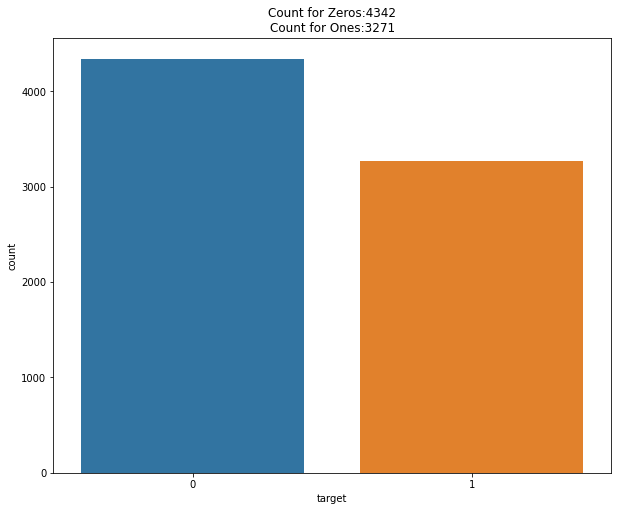

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(train.target)
plt.title('Count for Zeros:'+str(train.target.value_counts()[0])+'\n'+
         'Count for Ones:'+str(train.target.value_counts()[1]))
plt.show()

#1 represents a disaster tweet and 0 is not disaster tweet

Data Preprocessing

In [21]:
traintext = train['text']
y = train['target']

max_len = 100
max_words = 10000

In [22]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(traintext)
word_index = tokenizer.word_index
len(word_index)

22700

In [27]:
sequences = tokenizer.texts_to_sequences(traintext)
X = pad_sequences(sequences, maxlen=max_len)
X.shape

(7613, 100)

In [28]:
test_data = tokenizer.texts_to_sequences(test['text'])
test_data = pad_sequences(test_data, maxlen=max_len)
test_data.shape

(3263, 100)

In [29]:
y = np.array(y).reshape((-1,1))
y.shape

(7613, 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [42]:
def train_model(model, batch_size=32, epochs=14):
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.15)
    print('-' * 100)
    print('Test data')
    model.evaluate(X_test, y_test)
    return history

In [36]:
def visual_validation_and_accuracy(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_plot = np.arange(1, len(loss) + 1)
    plt.clf()

    plt.plot(epochs_plot, acc, 'r', label='Training acc')
    plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
    plt.plot(epochs_plot, loss, 'r:', label='Training loss')
    plt.plot(epochs_plot, val_loss, 'b:', label='Validation loss')
    plt.title('Validation and accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

# Deep NN

In [43]:
model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.6),
    Dense(8, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           320000    
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_9 (Dense)             (None, 16)                51216     
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [44]:
history = train_model(model)

Epoch 1/14
162/162 [==============================] - 1s 5ms/step - loss: 0.6859 - acc: 0.5599 - val_loss: 0.6798 - val_acc: 0.5744
Epoch 2/14
162/162 [==============================] - 1s 4ms/step - loss: 0.6644 - acc: 0.5639 - val_loss: 0.6536 - val_acc: 0.5744
Epoch 3/14
162/162 [==============================] - 1s 4ms/step - loss: 0.6309 - acc: 0.6105 - val_loss: 0.6019 - val_acc: 0.7396
Epoch 4/14
162/162 [==============================] - 1s 4ms/step - loss: 0.5879 - acc: 0.7237 - val_loss: 0.5737 - val_acc: 0.7593
Epoch 5/14
162/162 [==============================] - 1s 4ms/step - loss: 0.5404 - acc: 0.7751 - val_loss: 0.5632 - val_acc: 0.7790
Epoch 6/14
162/162 [==============================] - 1s 4ms/step - loss: 0.4861 - acc: 0.8228 - val_loss: 0.5654 - val_acc: 0.7757
Epoch 7/14
162/162 [==============================] - 1s 4ms/step - loss: 0.4481 - acc: 0.8398 - val_loss: 0.5802 - val_acc: 0.7560
Epoch 8/14
162/162 [==============================] - 1s 4ms/step - loss: 0.

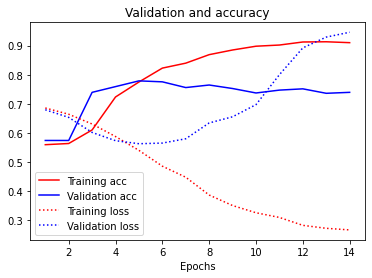

In [45]:
visual_validation_and_accuracy(history)

# RNN

In [46]:
model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 32)           2080      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 324,193
Trainable params: 324,193
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = train_model(model)

Epoch 1/14
162/162 [==============================] - 33s 185ms/step - loss: 0.6444 - acc: 0.6256 - val_loss: 0.6202 - val_acc: 0.6729
Epoch 2/14
162/162 [==============================] - 29s 180ms/step - loss: 0.4327 - acc: 0.8122 - val_loss: 0.6376 - val_acc: 0.7079
Epoch 3/14
162/162 [==============================] - 30s 184ms/step - loss: 0.2292 - acc: 0.9154 - val_loss: 0.7864 - val_acc: 0.6871
Epoch 4/14
162/162 [==============================] - 30s 184ms/step - loss: 0.1423 - acc: 0.9560 - val_loss: 0.8561 - val_acc: 0.6740
Epoch 5/14
162/162 [==============================] - 31s 190ms/step - loss: 0.1005 - acc: 0.9681 - val_loss: 0.8939 - val_acc: 0.6915
Epoch 6/14
162/162 [==============================] - 29s 181ms/step - loss: 0.0851 - acc: 0.9768 - val_loss: 0.8622 - val_acc: 0.6871
Epoch 7/14
162/162 [==============================] - 30s 184ms/step - loss: 0.0705 - acc: 0.9803 - val_loss: 1.0148 - val_acc: 0.6357
Epoch 8/14
162/162 [==============================] - 2

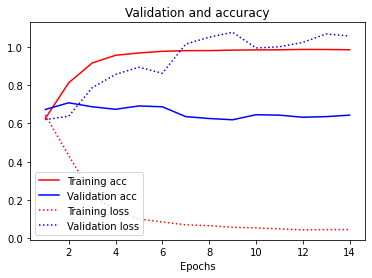

In [48]:
visual_validation_and_accuracy(history)

#LTSM

In [49]:
model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 32)           8320      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = train_model(model)

Epoch 1/14
162/162 [==============================] - 9s 18ms/step - loss: 0.5723 - acc: 0.7023 - val_loss: 0.4790 - val_acc: 0.7867
Epoch 2/14
162/162 [==============================] - 2s 12ms/step - loss: 0.3916 - acc: 0.8364 - val_loss: 0.4659 - val_acc: 0.7921
Epoch 3/14
162/162 [==============================] - 2s 12ms/step - loss: 0.3335 - acc: 0.8671 - val_loss: 0.4607 - val_acc: 0.8020
Epoch 4/14
162/162 [==============================] - 2s 12ms/step - loss: 0.2981 - acc: 0.8837 - val_loss: 0.4715 - val_acc: 0.7856
Epoch 5/14
162/162 [==============================] - 2s 12ms/step - loss: 0.2712 - acc: 0.8991 - val_loss: 0.5001 - val_acc: 0.8031
Epoch 6/14
162/162 [==============================] - 2s 12ms/step - loss: 0.2540 - acc: 0.9063 - val_loss: 0.5131 - val_acc: 0.7823
Epoch 7/14
162/162 [==============================] - 2s 12ms/step - loss: 0.2355 - acc: 0.9134 - val_loss: 0.5373 - val_acc: 0.7856
Epoch 8/14
162/162 [==============================] - 2s 12ms/step - 

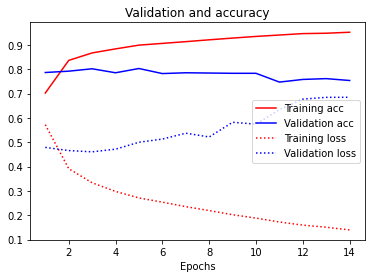

In [51]:
visual_validation_and_accuracy(history)

#GRU

In [52]:
model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    GRU(32, return_sequences=True),
    GRU(32),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru (GRU)                   (None, 100, 32)           6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 332,705
Trainable params: 332,705
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = train_model(model)

Epoch 1/14
162/162 [==============================] - 7s 17ms/step - loss: 0.5818 - acc: 0.6868 - val_loss: 0.4860 - val_acc: 0.7845
Epoch 2/14
162/162 [==============================] - 2s 11ms/step - loss: 0.3835 - acc: 0.8379 - val_loss: 0.4683 - val_acc: 0.7888
Epoch 3/14
162/162 [==============================] - 2s 12ms/step - loss: 0.3270 - acc: 0.8651 - val_loss: 0.4828 - val_acc: 0.7932
Epoch 4/14
162/162 [==============================] - 2s 12ms/step - loss: 0.2926 - acc: 0.8845 - val_loss: 0.5025 - val_acc: 0.7867
Epoch 5/14
162/162 [==============================] - 2s 11ms/step - loss: 0.2654 - acc: 0.8953 - val_loss: 0.5503 - val_acc: 0.7746
Epoch 6/14
162/162 [==============================] - 2s 11ms/step - loss: 0.2455 - acc: 0.9032 - val_loss: 0.5277 - val_acc: 0.7921
Epoch 7/14
162/162 [==============================] - 2s 11ms/step - loss: 0.2247 - acc: 0.9181 - val_loss: 0.5603 - val_acc: 0.7582
Epoch 8/14
162/162 [==============================] - 2s 12ms/step - 

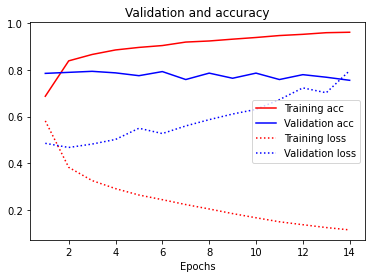

In [54]:
visual_validation_and_accuracy(history)

#Predict best model

In [55]:
#predict = model.predict(test_data)
#predict.shape

In [ ]:
#predict = (predict >= 0.5).astype(int)

In [56]:
#submission.target = predict
#submission.head(10)

In [ ]:
#submission.to_csv('submission.csv', index=False)